In [272]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [273]:
# Configure API key 

quandl.ApiConfig.api_key = '2BUhYKbj88s2GLy9YkCv'

In [274]:
# Defining path
path = r'/Users/michaelyeboah/Desktop/Careerfoundry'

In [275]:
#Importing Immoscount_datasets
vc= pd.read_excel(os.path.join(path,'Employee Attrition.xlsx'))

In [276]:
vc.shape

(49653, 18)

In [277]:
vc.head()

,Employee ID,Record Date_Key,birthdate_key,Orig Hire Date_key,Termination date_key,Age,Length_of_Service,City_Name,Department_Name,Job_Title,Store_Name,Gender_Short,Gender_full,Term reason_desc,Term Type_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [278]:
vc.columns

Index(['Employee ID', 'Record Date_Key', 'birthdate_key', 'Orig Hire Date_key',
       'Termination date_key', 'Age', 'Length_of_Service', 'City_Name',
       'Department_Name', 'Job_Title', 'Store_Name', 'Gender_Short',
       'Gender_full', 'Term reason_desc', 'Term Type_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [279]:
# Fix borough value format
vc['City_Name']=vc['City_Name'].str.title()
vc.head()

,Employee ID,Record Date_Key,birthdate_key,Orig Hire Date_key,Termination date_key,Age,Length_of_Service,City_Name,Department_Name,Job_Title,Store_Name,Gender_Short,Gender_full,Term reason_desc,Term Type_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [280]:
vc.dtypes

Employee ID                      int64
Record Date_Key         datetime64[ns]
birthdate_key           datetime64[ns]
Orig Hire Date_key      datetime64[ns]
Termination date_key    datetime64[ns]
Age                              int64
Length_of_Service                int64
City_Name                       object
Department_Name                 object
Job_Title                       object
Store_Name                       int64
Gender_Short                    object
Gender_full                     object
Term reason_desc                object
Term Type_desc                  object
STATUS_YEAR                      int64
STATUS                          object
BUSINESS_UNIT                   object
dtype: object

In [281]:
# convert date datatype to datetime
vc['Orig Hire Date_key']=pd.to_datetime(vc['Orig Hire Date_key'], infer_datetime_format=True)

In [282]:
vc.dtypes

Employee ID                      int64
Record Date_Key         datetime64[ns]
birthdate_key           datetime64[ns]
Orig Hire Date_key      datetime64[ns]
Termination date_key    datetime64[ns]
Age                              int64
Length_of_Service                int64
City_Name                       object
Department_Name                 object
Job_Title                       object
Store_Name                       int64
Gender_Short                    object
Gender_full                     object
Term reason_desc                object
Term Type_desc                  object
STATUS_YEAR                      int64
STATUS                          object
BUSINESS_UNIT                   object
dtype: object

## 02. Subsetting, Wrangling, and Cleaning

Dataset represent the compilation of fictitious/fake data on terminations. For each 10 years it show employees that are active and those that are  terminated.

In [283]:
# vc_2: new dataset including the Orig Hire Date_key and Length_of_Service for employees that are active and those that are terminated.
vc_2= vc.groupby('Orig Hire Date_key')['Length_of_Service'].sum()

In [284]:
vc_2.head()

Orig Hire Date_key
1989-08-28    860
1989-08-31    430
1989-09-02    215
1989-09-05    215
1989-09-08    215
Name: Length_of_Service, dtype: int64

In [285]:
vc_2.shape

(4415,)

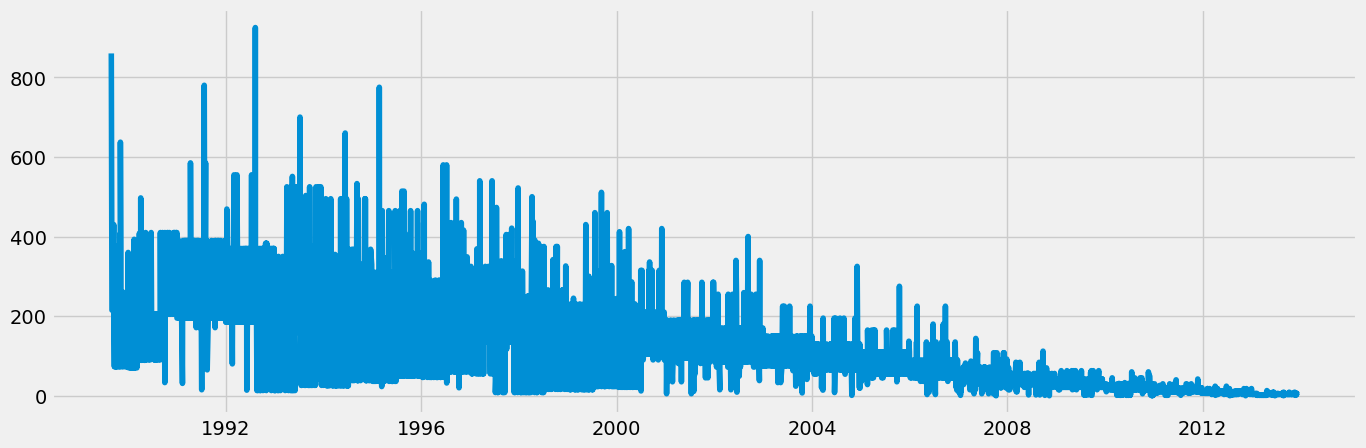

In [286]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(vc_2)

In [256]:
# check for missing values
vc_2.isnull().sum()

0

In [287]:
# check for duplicates
dups= vc_2.duplicated()
dups.sum()

4152

## 03. Time-Series Analysis: Decomposition

In [288]:
vc_2.head()

Orig Hire Date_key
1989-08-28    860
1989-08-31    430
1989-09-02    215
1989-09-05    215
1989-09-08    215
Name: Length_of_Service, dtype: int64

Unsure how to fix the below code so that I can decompose the dataframe

In [289]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(vc_2, model='additive',period= 365)

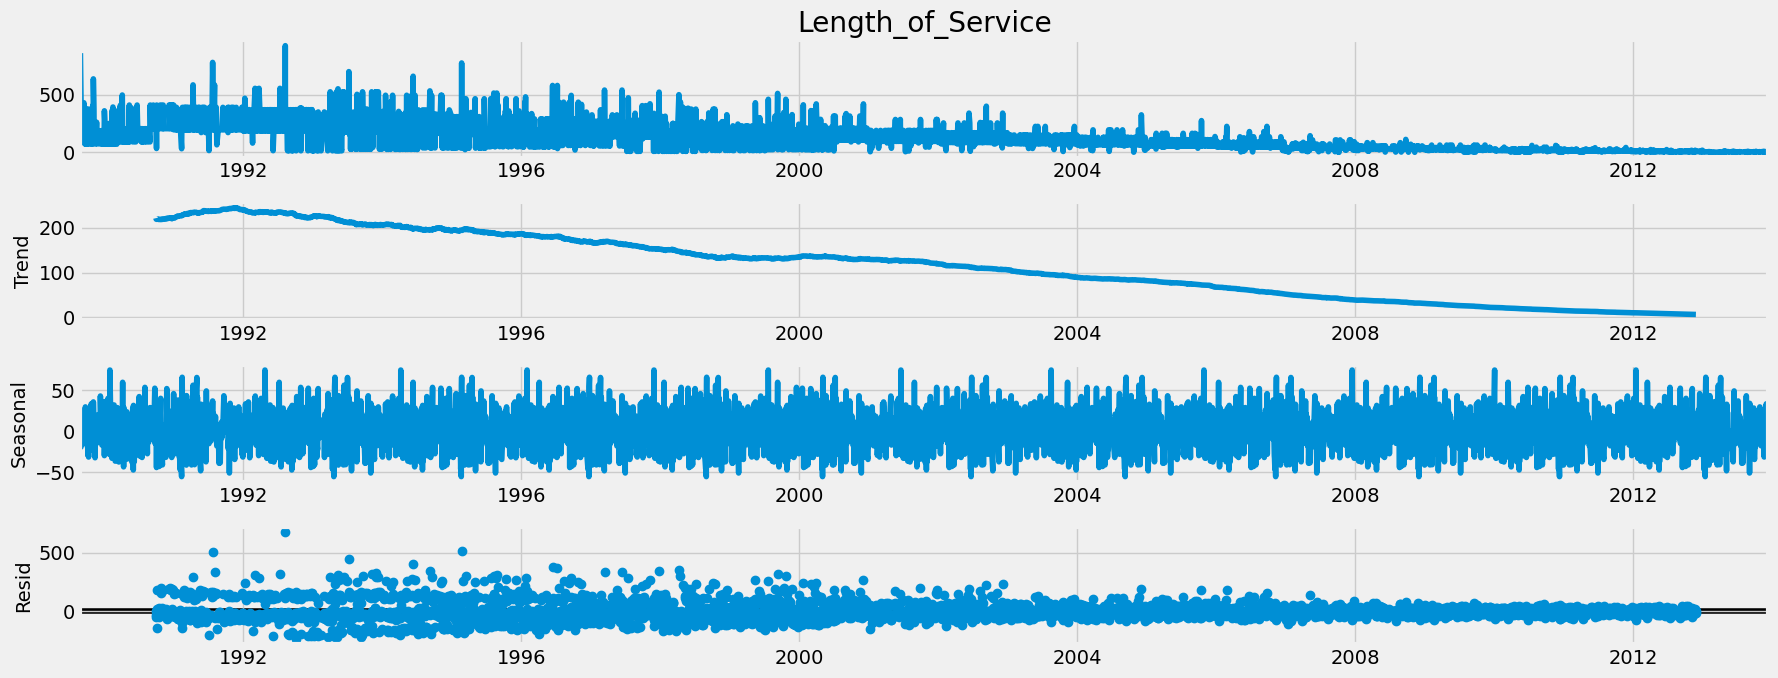

In [290]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

# Plot the separate components

decomposition.plot()
plt.show()

# 04. Testing for stationarity

In [294]:
vc_2 = vc.groupby('Orig Hire Date_key')['Length_of_Service'].sum().reset_index()

In [295]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(vc_2['Length_of_Service'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.980700
p-value                           0.295099
Number of Lags Used              31.000000
Number of Observations Used    4383.000000
Critical Value (1%)              -3.431843
Critical Value (5%)              -2.862200
Critical Value (10%)             -2.567121
dtype: float64


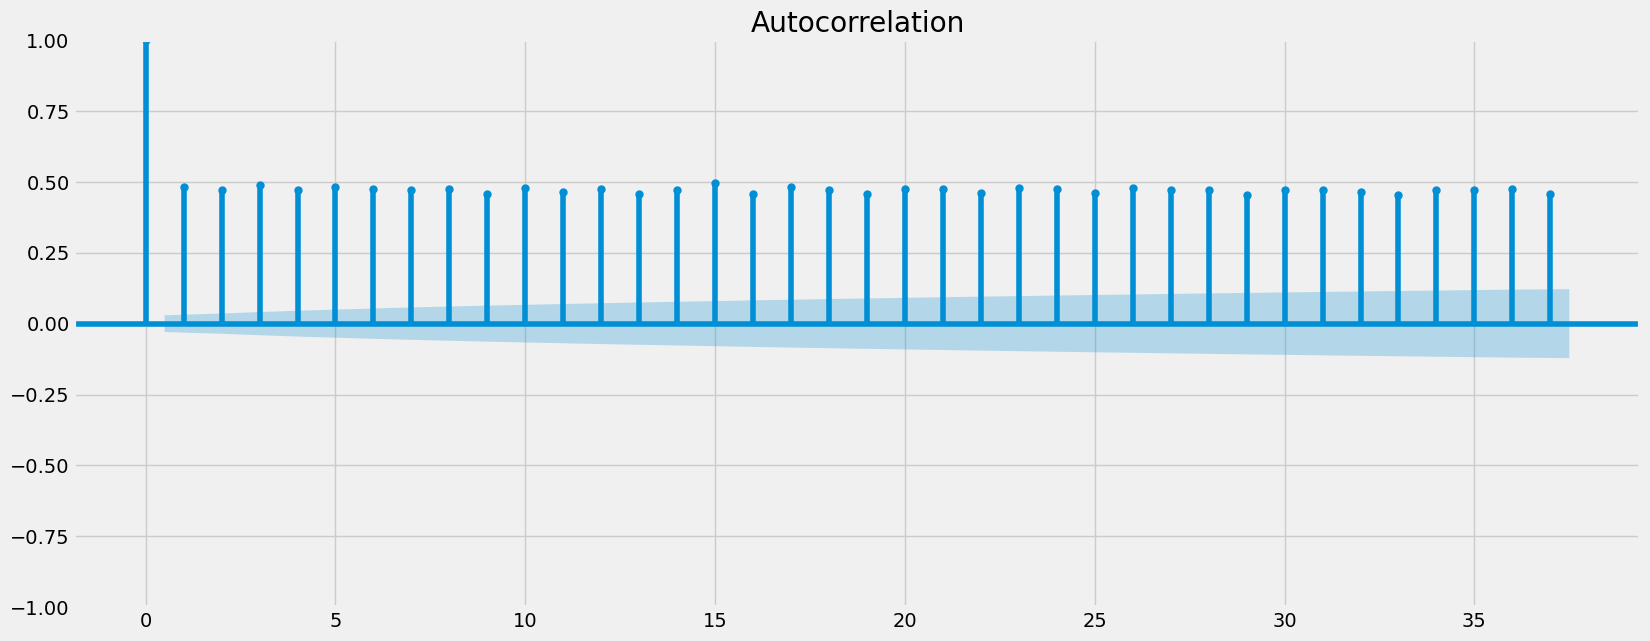

In [217]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(vc_2)
plt.show()

# 05. Additional Time Series

### Subsetting, wrangling, and cleaning time-series data

In [218]:
vc_2.head()

Orig Hire Date_key
1989-08-28    860
1989-08-31    430
1989-09-02    215
1989-09-05    215
1989-09-08    215
Name: Length_of_Service, dtype: int64

In [219]:
# Reset index so 'date' column can be used as a filter
vc_3=vc_2.reset_index()
vc_3.head()

,Orig Hire Date_key,Length_of_Service
0,1989-08-28,860
1,1989-08-31,430
2,1989-09-02,215
3,1989-09-05,215
4,1989-09-08,215


In [226]:
vc_sub= vc_3.loc[(vc_3['Orig Hire Date_key']>= '1990-01-01') & (vc_3['Orig Hire Date_key']< '1993-12-11')]
vc_sub.shape

(682, 2)

In [227]:
vc_sub.head()

,Orig Hire Date_key,Length_of_Service
59,1990-01-01,360
60,1990-01-04,250
61,1990-01-05,250
62,1990-01-06,70
63,1990-01-10,180


In [229]:
# set 'date' column as the index

from datetime import datetime

vc_sub['datetime'] = pd.to_datetime(vc_sub['Orig Hire Date_key']) # Create a datetime column from "Date.""
vc_sub = vc_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
vc_sub.drop(['Orig Hire Date_key'], axis=1, inplace=True) # Drop the "Date" column.
vc_sub.head()

,Length_of_Service
datetime,
1990-01-01,360
1990-01-04,250
1990-01-05,250
1990-01-06,70
1990-01-10,180


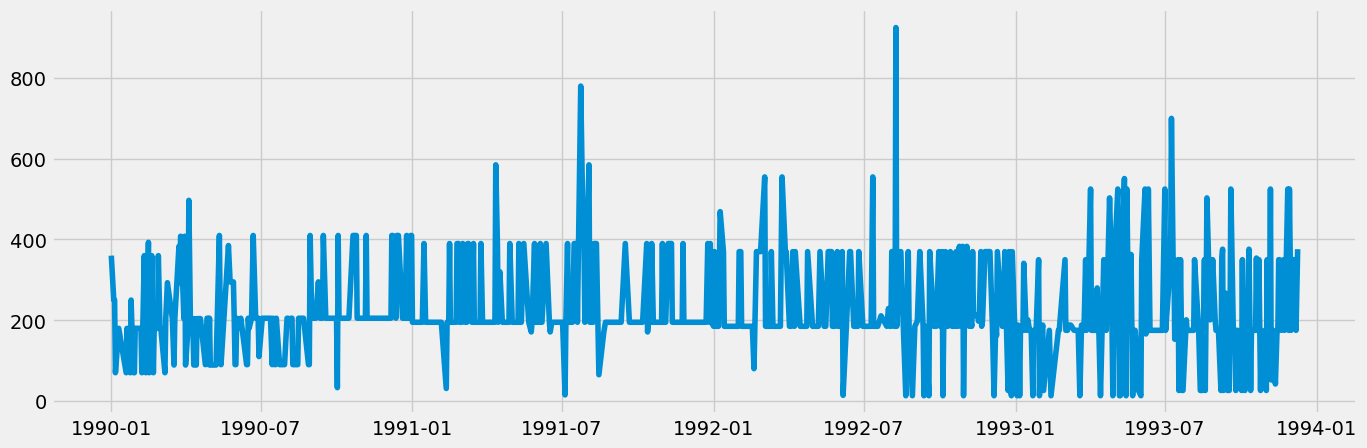

In [230]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(vc_sub)

### Time-series analysis: decompostion

In [236]:
# Decompose the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(vc_sub, model='additive',period= 1)

In [237]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

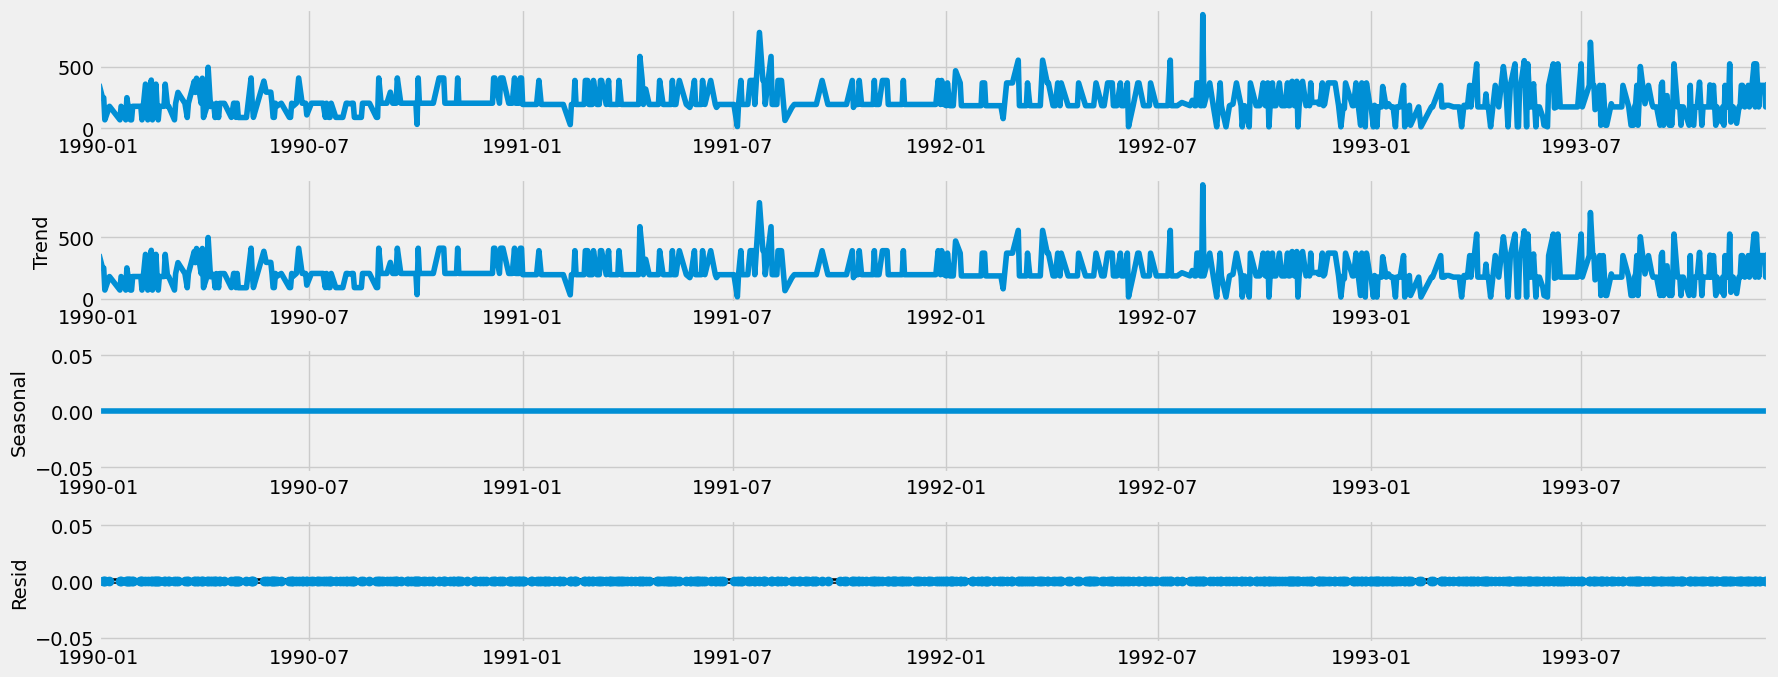

In [238]:
# Plot the separate components

decomposition2.plot()
plt.show()

### Testing for Stationarity

In [239]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(vc_sub['Length_of_Service'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.311451e+01
p-value                        1.609414e-24
Number of Lags Used            2.000000e+00
Number of Observations Used    6.790000e+02
Critical Value (1%)           -3.440017e+00
Critical Value (5%)           -2.865806e+00
Critical Value (10%)          -2.569042e+00
dtype: float64


#### Test Stat is not smaller than critical values, therefore we cannot reject our null hypothesis of the presence of a unit root. The data is not stationary.

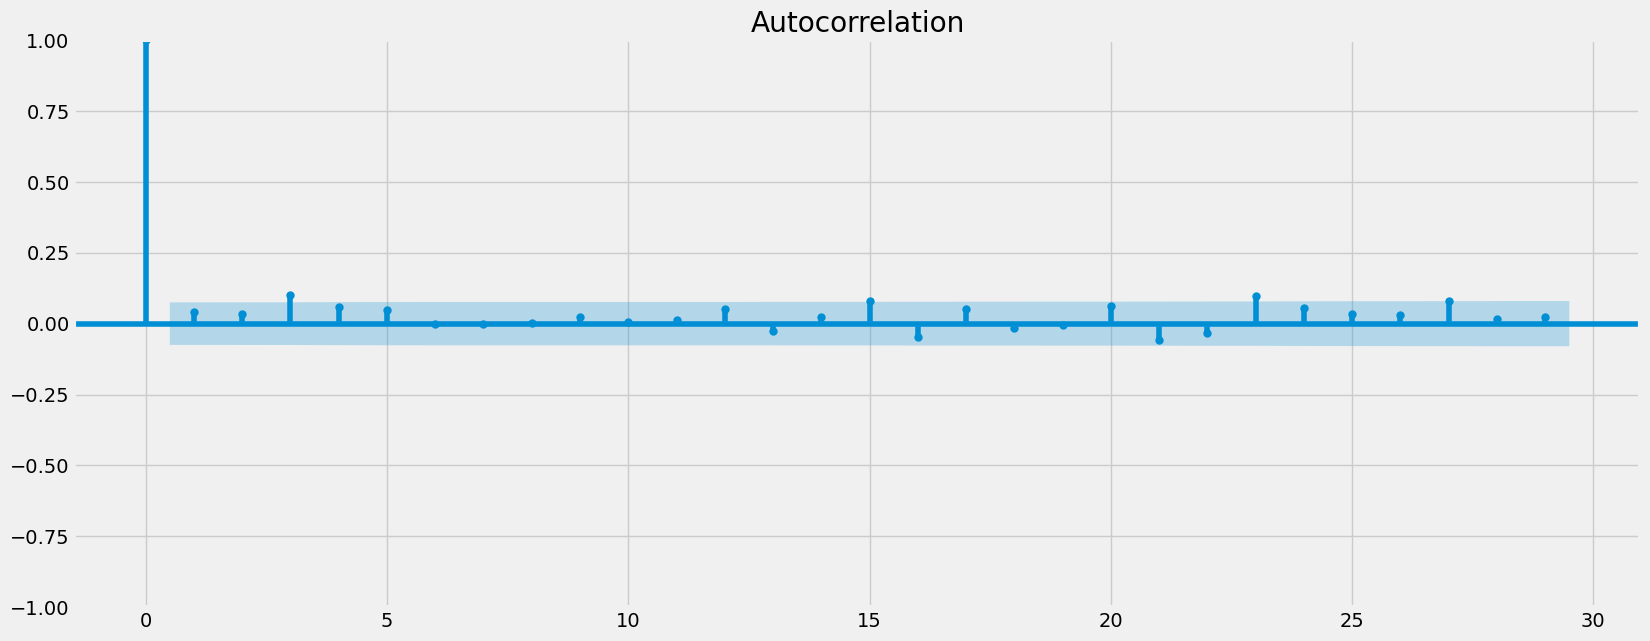

In [240]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(vc_sub)
plt.show()

#### There are many lags that are correlated with each other, indicating the data is non-stationary.

### Stationarizing Data

In [245]:
vc_diff =vc_sub - vc_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [246]:
vc_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [247]:
vc_diff.head()

,Length_of_Service
datetime,
1990-01-04,-110.0
1990-01-05,0.0
1990-01-06,-180.0
1990-01-10,110.0
1990-01-19,-110.0


In [248]:
vc_diff.columns

Index(['Length_of_Service'], dtype='object')

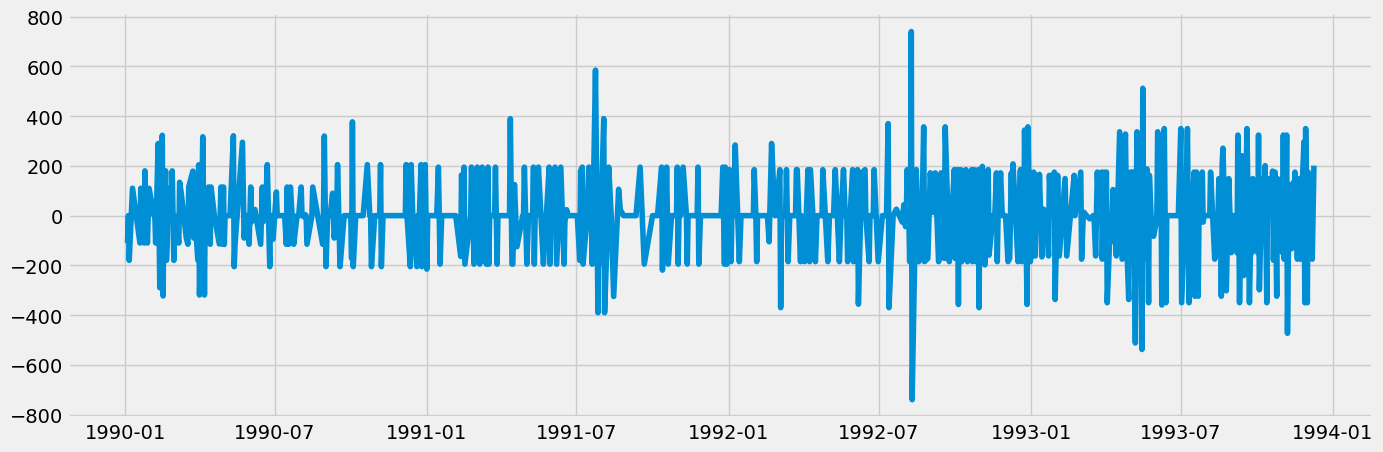

In [249]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(vc_diff)

In [250]:
dickey_fuller(vc_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.972181e+00
p-value                        2.225375e-17
Number of Lags Used            1.800000e+01
Number of Observations Used    6.620000e+02
Critical Value (1%)           -3.440267e+00
Critical Value (5%)           -2.865916e+00
Critical Value (10%)          -2.569100e+00
dtype: float64


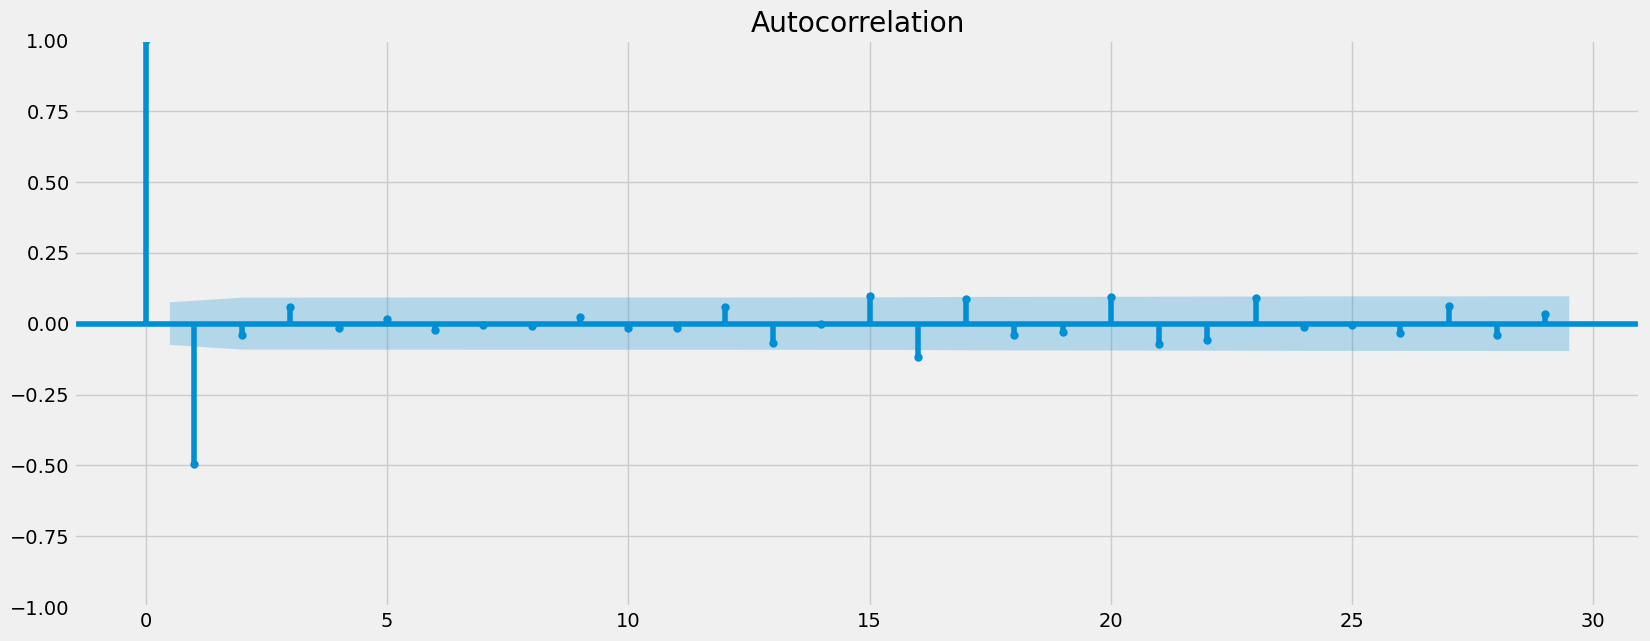

In [251]:
plot_acf(vc_diff)
plt.show()

#### In the Dickey-Fuller test the test stat< critical values, and on the autocorrelation graph there is only 1 lag above the confidance interval. Based on these results, the data is now stationary.